In [26]:
%pip show rawio

Name: rawio
Version: 1.4.1
Summary: Read and write cdms raw binary format
Home-page: https://gitlab.com/supercdms/DataHandling/pyRawIO.git
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.8/dist-packages
Requires: numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from tqdm import tqdm_notebook
import joblib
import os
import uproot

In [2]:
import rawio.IO as io
from scdmsPyTools.Traces.Filtering import *
from scdmsPyTools.Traces.Noise import *
from scdmsPyTools.TES.Templates import *
from scdmsPyTools.Traces.Stats import *
#from scdmsPyTools.BatTools.IO import *
from rawio import IO

In [3]:
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/nexus/midasdata/NEXUS/R7/processed/auto_proc/OFResults_"
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/nexus/midasdata/NEXUS/R7/processed/master_releases/v2.0.0/OFResults_"
rawdir = "/data/chocula/k100/midasraw/byseries/"
procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/umn/rq/"
series='07160213_0915/'
series2='07220531_0810/'
procseries='07191122_0915/'

In [4]:
events=io.getRawEvents(rawdir,series)
#events2=io.getRawEvents(rawdir,series2)

The file is: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0001.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0001.mid.gz
The file is: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0002.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0002.mid.gz
The file is: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0003.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0003.mid.gz
The file is: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0004.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0004.mid.gz
The file is: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0005.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07160213_0915/07160213_0915_F0005.mid.gz
The file is: /data/chocul

In [5]:
type(events)

pandas.core.frame.DataFrame

In [6]:
events.keys()

MultiIndex([('Z1', 'QI'),
            ('Z1', 'QO'),
            ('Z1', 'PA'),
            ('Z1', 'PB'),
            ('Z1', 'PC'),
            ('Z1', 'PD'),
            ('Z2', 'QI'),
            ('Z2', 'QO'),
            ('Z2', 'PA'),
            ('Z2', 'PB'),
            ('Z2', 'PC'),
            ('Z2', 'PD'),
            ('Z3', 'QI'),
            ('Z3', 'QO'),
            ('Z3', 'PA'),
            ('Z3', 'PB'),
            ('Z3', 'PC'),
            ('Z3', 'PD')],
           )

In [8]:
num = events['Z3']['PA'].keys()[0][0]
#num2 = events2['Z4']['PA'].keys()[0][0]

In [12]:
events['Z3']

QI  \
71602130915 10000   [32627, 32601, 32592, 32613, 32623, 32630, 326...   
            10001   [32614, 32610, 32612, 32607, 32615, 32614, 326...   
            10002   [32631, 32643, 32588, 32589, 32605, 32629, 326...   
            10003   [32625, 32626, 32642, 32638, 32638, 32615, 326...   
            10004   [32635, 32620, 32628, 32646, 32641, 32650, 326...   
...                                                               ...   
            310635  [32649, 32632, 32626, 32616, 32599, 32612, 326...   
            310636  [32598, 32603, 32614, 32617, 32628, 32618, 325...   
            310637  [32615, 32611, 32594, 32593, 32630, 32638, 326...   
            310638  [32617, 32608, 32605, 32600, 32613, 32620, 326...   
            310639  [32634, 32607, 32603, 32629, 32640, 32643, 326...   

                                                                   QO  \
71602130915 10000   [32813, 32796, 32796, 32818, 32811, 32819, 328...   
            10001   [32823, 32825, 32810, 32810, 32816, 32819, 328...   
            10002   [32817, 32801, 32798, 32796, 32797, 32817, 328...   
            10003   [32802, 32807, 32824, 32814, 32823, 32808, 328...   
            10004   [32806, 32807, 32815, 32822, 32803, 32803, 328...   
...                                                               ...   
            310635  [32811, 32799, 32811, 32815, 32801, 32807, 327...   
            310636  [32811, 32813, 32808, 32819, 32800, 32798, 328...   
            310637  [32806, 32812, 32822, 32805, 32810, 32816, 328...   
            310638  [32813, 32813, 32814, 32817, 32802, 32798, 328...   
            310639  [32816, 32818, 32804, 32816, 32811, 32803, 327...   

                                                                   PA  \
71602130915 10000   [4120, 4147, 4168, 4199, 3996, 3991, 4000, 401...   
            10001   [3685, 3687, 3694, 3684, 3734, 3721, 3713, 370...   
            10002   [4295, 4263, 4266, 4275, 4287, 4272, 4285, 428...   
            10003   [3759, 3759, 3785, 3775, 3801, 3708, 3715, 371...   
            10004   [3709, 3720, 3734, 3728, 3766, 3765, 3768, 377...   
...                                                               ...   
            310635  [2687, 2701, 2711, 2711, 2734, 2738, 2740, 274...   
            310636  [2774, 2771, 2773, 2767, 2929, 2918, 2935, 294...   
            310637  [2738, 2711, 2720, 2718, 2724, 2721, 2718, 272...   
            310638  [3679, 3684, 3699, 3697, 3704, 3706, 3033, 303...   
            310639  [2794, 2806, 2809, 2819, 2826, 2820, 2812, 280...   

                                                                   PB  \
71602130915 10000   [4685, 4690, 4700, 4683, 4648, 4638, 4640, 462...   
            10001   [4261, 4266, 4265, 4271, 4286, 4281, 4278, 428...   
            10002   [4233, 4221, 4222, 4228, 4230, 4225, 4224, 422...   
            10003   [4264, 4266, 4261, 4259, 4252, 4248, 4245, 426...   
            10004   [4344, 4336, 4326, 4336, 4332, 4336, 4349, 435...   
...                                                               ...   
            310635  [4586, 4590, 4599, 4621, 4631, 4641, 3426, 343...   
            310636  [3456, 3454, 3464, 3475, 3531, 3527, 3510, 351...   
            310637  [3436, 3446, 3442, 3448, 3449, 3442, 3429, 342...   
            310638  [3582, 3594, 3576, 3580, 3588, 3596, 3594, 359...   
            310639  [3479, 3471, 3459, 3473, 3478, 3472, 3475, 347...   

                                                                   PC  \
71602130915 10000   [5542, 5536, 5537, 5524, 5495, 5492, 5493, 551...   
            10001   [5329, 5330, 5339, 5347, 5368, 5362, 5346, 536...   
            10002   [13531, 5629, 5612, 5612, 5607, 5605, 5614, 56...   
            10003   [12364, 12366, 12366, 12366, 12350, 5343, 5336...   
            10004   [5398, 5385, 5376, 5372, 5380, 5398, 5392, 538...   
...                                                               ...   
            310635  [5603, 5625, 5628, 5632, 563

for x in events['Z4']['PA'][num].keys():
    if set(events['Z4']['PA'][num][x]) != {0}: print(x)

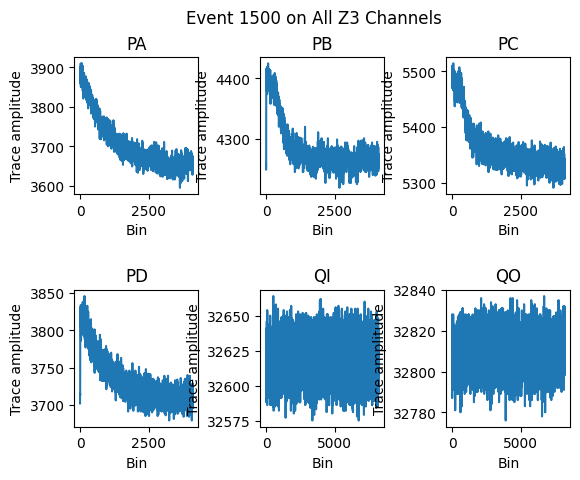

In [17]:
channels=['PA','PB','PC','PD','QI','QO']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

zip = 'Z3'

for j,channel in enumerate(channels):
    plt.subplot(2,3,j+1)
    plt.plot(events[zip][channel][num][10010]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All '+zip+' Channels')
plt.show()

In [ ]:
zip = 'Z4'

#for j,channel in enumerate(channels):
plt.plot(events2[zip]['PB'][num2][20015]) # index 0 corresponds to first event
#plt.xlim(3000)
plt.xlabel('Time')
plt.ylabel('Trace amplitude')

#plt.suptitle('Event 1500 on All '+zip+' Channels')
plt.show()

In [ ]:
for x in events['Z4']['PA'][num]:
    plt.plot(x)#,alpha-0.6)
plt.ylim(0,13000)
plt.show()

In [ ]:
from collections import Counter
list = []
for x in events['Z4']['PA'][num].keys():
    xheight = events['Z4']['PA'][num][x]
    if type(xheight) != np.ndarray:
        xheight = xheight.values[0]
    try:
        list.append(np.where(xheight<=8000)[0][0])#==32764)[0][0])
        #print(x,np.where(xheight<=8000)[0][0])
    except IndexError: #it was a flatline
        list.append(np.nan)
#print(list)

#dot plot generation - https://stackoverflow.com/questions/57830130/how-do-i-convert-this-histogram-into-a-dot-plot-dot-chart-using-matplotlib-and-n
z = Counter(list)
ar = 0.2
fig, ax = plt.subplots(figsize=(plt.figaspect(ar)))
for key, value in z.items():
    if key == 0:
        continue
    X = [key] * value
    Y = [item + 1 for item in range(value)]
    plt.scatter(X, Y, color='b')

#plt.ylim(0,25)
plt.title("Logic Pulse Timing")
plt.xlabel("Time of Logic Pulse (clock ticks within pulse data)")
plt.ylabel("Frequency")
plt.show()
print("nans:",z[np.nan])
print("zeroes:",z[0])

In [ ]:
print(z[np.nan]/len(list))

In [ ]:
channels2=['PB','PC','PD']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels2):
    plt.subplot(2,3,j+1)
    plt.plot(events.Z3[channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z3 Channels')
plt.show()

In [ ]:
channels2=['PA','PB']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels2):
    plt.subplot(2,3,j+1)
    plt.plot(events.Z4[channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z4 Channels')
plt.show()

In [ ]:
plt.figure()

for j in range(1499,1505):
    plt.plot(events.Z1.PA[j]) # iterate over the first 20 events

plt.title('6 Sample Events on Z1PA')
plt.show()

In [ ]:
events['Z1']['PA'][0]

In [ ]:
zips=['Z1','Z3']
channels=['PA','PB','PC','PD']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)
for i,zips in enumerate(zips):
    plt.subplot(2,3,i+1) 
    for j,channel in enumerate(channels):
        plt.subplot(2,3,j+1)
        plt.plot(events[zips][channel][1500],label=zips) # index 0 corresponds to first event
        plt.title(channel)
        plt.xlabel('Bin')
        plt.ylabel('Trace amplitude')

plt.suptitle('event 1500 on All Channels')
plt.legend()
plt.show()

In [ ]:
#Re-map events to actual channels
zips=['Z1','Z3']
channels=['PA','PB','PC','PD']

for zips in (zips):
    for channels in (channels):
        for i in (events[zips][channels]):
            if zips=='Z1':
                if channels=='PA':
                    eventsMap['PE'][i]=dict()
                    eventsMap['PE'][i].append(events[zips][channels][i])
                elif channels=='PB':
                    eventsMap['PB'][i]=dict()
                    eventsMap['PB'][i].append(events[zips][channels][i])
                elif channels=='PC':
                    eventsMap['PD'][i]=dict()
                    eventsMap['PD'][i].append(events[zips][channels][i])
            elif zips=='Z3':
                if channels=='PB':
                    eventsMap['PA'][i]=dict()
                    eventsMap['PA'][i].append(events[zips][channels][i])
                elif channels=='PC':
                    eventsMap['PC'][i]=dict()
                    eventsMap['PC'][i].append(events[zips][channels][i])
                elif channels=='PD':
                    eventsMap['PF'][i]=dict()
                    eventsMap['PF'][i].append(events[zips][channels][i])

In [ ]:
eventsMap['PA']

In [ ]:
for j,channel in enumerate(detchan):
        plt.subplot(2,3,j+1)
        plt.plot(eventsMap[channel][1500]) # index 0 corresponds to first event
        plt.title(channel)
        plt.xlabel('Bin')
        plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Channels')
plt.legend()
plt.show()

In [ ]:
RQ[1].allkeys()

In [ ]:
PTOFamps=[]
for i in range(1,10):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PTOFamps,bins=100,range=[1e-8,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
PFS1OFamps=[]
for i in range(1,10):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PFS1OFamps,bins=100,range=[0,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
PFS2OFamps=[]
for i in range(1,10):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PFS2OFamps,bins=100,range=[0,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))